### Linear Regression:
* Independent Variable (Features)
* Dependent Variable (Label Variable)

By using independent variable, we are trying to predict the dependent variable.

For example: Tempeture vs Ice Cream Sales

Which means to say Temp is the <b> causing variable </b> and icecream is the <b> effecting variable </b>

Causing variable also called as independent variable and effection variable is the dependent variable.

### Rules and guidelines:

X & Y:

* Numerical variable / continuous variable
* two variable must be in linear in nature
* variance of error should be constant


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'AirPassengers.csv',
 'hotel.jpg',
 'Linear Regression.ipynb',
 'Pandas with Sketch.ipynb',
 'Parallel Computing with Dask.ipynb',
 'Python API.ipynb',
 'Python Overview of Un Structured Data.ipynb']

In [3]:
air = pd.read_csv("AirPassengers.csv")

In [4]:
air.shape

(80, 9)

In [5]:
air.isnull().mean()

Week_num                        0.0
Passengers                      0.0
Promotion_Budget                0.0
Service_Quality_Score           0.0
Holiday_week                    0.0
Delayed_Cancelled_flight_ind    0.0
Inter_metro_flight_ratio        0.0
Bad_Weather_Ind                 0.0
Technical_issues_ind            0.0
dtype: float64

In [6]:
pd.isnull("AirPassengers.csv")

False

In [7]:
air1 = air[["Passengers","Promotion_Budget"]].copy()

In [8]:
air1.head()

,Passengers,Promotion_Budget
0,37824,517356
1,43936,646086
2,42896,638330
3,35792,506492
4,38624,609658


* Promotion_budget : Independent Variable
* Passengers : Dependent Variable

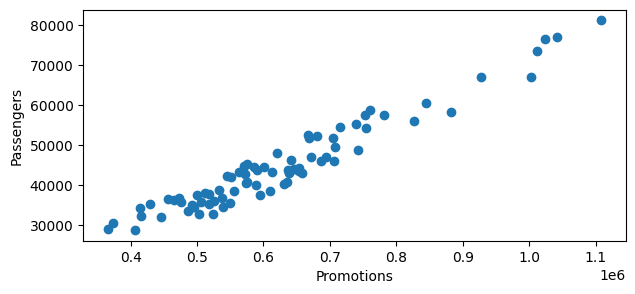

In [9]:
plt.figure(figsize=(7,3))
plt.scatter(air1["Promotion_Budget"], air1["Passengers"])
plt.xlabel("Promotions")
plt.ylabel("Passengers")
plt.show()

<Figure size 700x300 with 0 Axes>

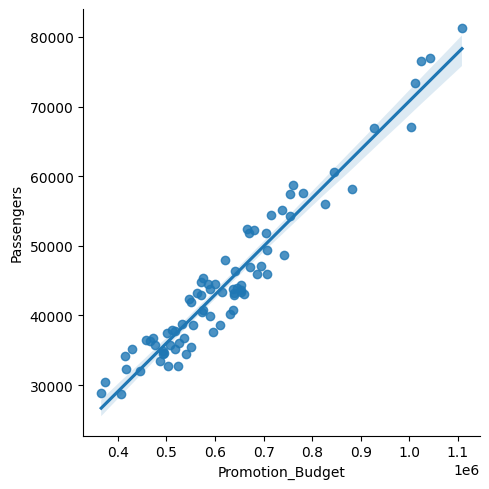

In [12]:
plt.figure(figsize=(7,3))
sns.lmplot(x = "Promotion_Budget", y = "Passengers", data = air1)
plt.show()

In [13]:
sns.lmplot?

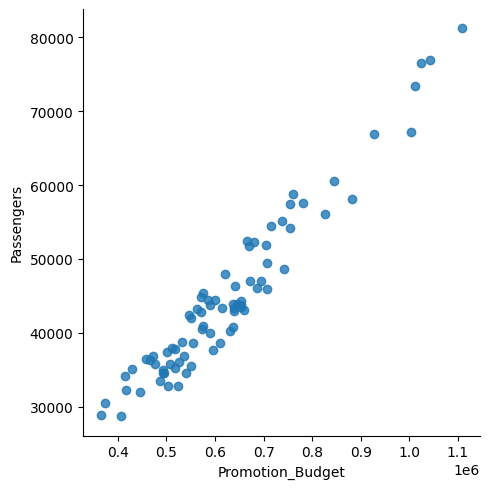

In [15]:
sns.lmplot(x = "Promotion_Budget", y = "Passengers", data = air1, fit_reg = False)
plt.show()

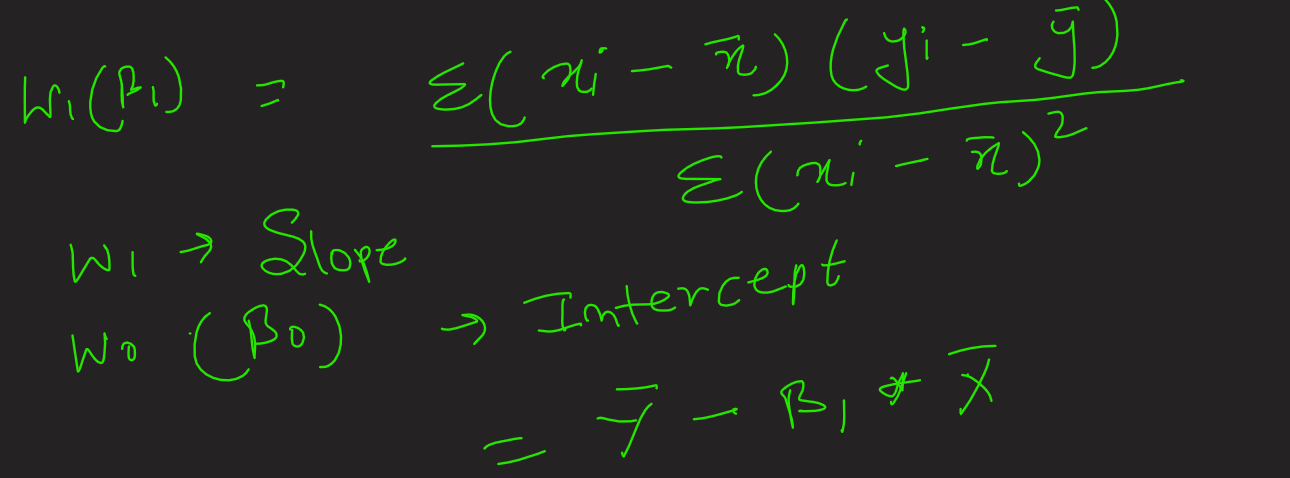

In [16]:
def coef_calc(x,y):
    a = sum((x - np.mean(x)) * (y - np.mean(y)))
    b = sum((x - np.mean(x))**2)
    slope = a / b
    intercept = np.mean(y) - (slope * (np.mean(x)))
    print(f"Slope Value : {slope}")
    print(f"Intercept Value : {intercept}")
    return slope, intercept

In [17]:
coefs = coef_calc(x = air1["Promotion_Budget"], y = air1["Passengers"])

Slope Value : 0.0695296852886541
Intercept Value : 1259.6058320095326


In [18]:
air1["Predict_values"] = coefs[0] + coefs[1] * air1["Promotion_Budget"]

In [19]:
air1.head()

,Passengers,Promotion_Budget,Predict_values
0,37824,517356,6.516646e+08
1,43936,646086,8.138137e+08
2,42896,638330,8.040442e+08
3,35792,506492,6.379803e+08
4,38624,609658,7.679288e+08


In [20]:
import statsmodels.formula.api as sm

In [21]:
sm?

In [22]:
model = sm.ols(formula = "Passengers~Promotion_Budget", data = air1).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.66e-47
Time:                        12:41:21   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071      0.925      0.358   -1450.078    3969.290
Promotion_Budget     0.0695      0.002     32.923      0.000       0.065       0.074
==============================================================================
Omnibus:                       26.624   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.188
Skew:                          -0.128   Prob(JB):                       0.0747
Kurtosis:                       1.779   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model.params

Intercept           1259.605832
Promotion_Budget       0.069530
dtype: float64

In [25]:
air1.head()

,Passengers,Promotion_Budget,Predict_values
0,37824,517356,6.516646e+08
1,43936,646086,8.138137e+08
2,42896,638330,8.040442e+08
3,35792,506492,6.379803e+08
4,38624,609658,7.679288e+08


In [26]:
def outlierdectection(data, x):
    iqr = data[x].quantile(0.75) - data[x].quantile(0.25)
    lo = data[x].quantile(0.25) - 1.5 * iqr
    uo = data[x].quantile(0.75) + 1.5 * iqr
    print('Lower outlier value: ',lo)
    print("Upper outlier value: ",uo)

In [27]:
outlierdectection(data = air1, x = "Promotion_Budget")

Lower outlier value:  261838.5
Upper outlier value:  944646.5


In [28]:
air1.Promotion_Budget.min()

365680

In [29]:
air1.Promotion_Budget.max()

1108254

In [30]:
outlierdectection(data = air1, x = "Passengers")

Lower outlier value:  17764.0
Upper outlier value:  67524.0


In [31]:
air1.Passengers.max()

81228

In [32]:
air1.Passengers.min()

28700

In [34]:
air1["Promotion_Budget"] = np.where(air1["Promotion_Budget"] > 944646.5,944646.5,air1["Promotion_Budget"] )

In [35]:
air1.head()

,Passengers,Promotion_Budget,Predict_values
0,37824,517356.0,6.516646e+08
1,43936,646086.0,8.138137e+08
2,42896,638330.0,8.040442e+08
3,35792,506492.0,6.379803e+08
4,38624,609658.0,7.679288e+08


In [36]:
air1.Promotion_Budget.max()

944646.5

In [37]:
air1["Passengers"] = np.where(air1["Passengers"] >67524.0,67524.0,air1['Passengers'] )

In [38]:
air1.head()

,Passengers,Promotion_Budget,Predict_values
0,37824.0,517356.0,6.516646e+08
1,43936.0,646086.0,8.138137e+08
2,42896.0,638330.0,8.040442e+08
3,35792.0,506492.0,6.379803e+08
4,38624.0,609658.0,7.679288e+08


In [39]:
model = sm.ols(formula = "Passengers~Promotion_Budget", data = air1).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     921.2
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           5.99e-45
Time:                        12:50:13   Log-Likelihood:                -747.75
No. Observations:                  80   AIC:                             1499.
Df Residuals:                      78   BIC:                             1504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2302.7793   1417.927      1.624      0.108    -520.097    5125.656
Promotion_Budget     0.0677      0.002     30.351      0.000       0.063       0.072
==============================================================================
Omnibus:                       13.711   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.960
Skew:                          -0.117   Prob(JB):                        0.138
Kurtosis:                       1.935   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
air.columns

Index(['Week_num', 'Passengers', 'Promotion_Budget', 'Service_Quality_Score',
       'Holiday_week', 'Delayed_Cancelled_flight_ind',
       'Inter_metro_flight_ratio', 'Bad_Weather_Ind', 'Technical_issues_ind'],
      dtype='object')

In [42]:
test = sm.ols(formula = "Passengers~Promotion_Budget+Service_Quality_Score",
             data = air).fit()

In [43]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     744.0
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           4.38e-51
Time:                        12:51:09   Log-Likelihood:                -738.91
No. Observations:                  80   AIC:                             1484.
Df Residuals:                      77   BIC:                             1491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.853e+04   3464.796      5.348      0.000    1.16e+04    2.54e+04
Promotion_Budget          0.0544      0.003     16.063      0.000       0.048       0.061
Service_Quality_Score -2807.3095    529.958     -5.297      0.000   -3862.592   -1752.028
==============================================================================
Omnibus:                        7.728   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                2.913
Skew:                          -0.043   Prob(JB):                        0.233
Kurtosis:                       2.069   Cond. No.                     7.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
air1["Pred"] = model.predict()

In [45]:
air1.head()

,Passengers,Promotion_Budget,Predict_values,Pred
0,37824.0,517356.0,6.516646e+08,37344.432940
1,43936.0,646086.0,8.138137e+08,46063.597448
2,42896.0,638330.0,8.040442e+08,45538.266601
3,35792.0,506492.0,6.379803e+08,36608.590454
4,38624.0,609658.0,7.679288e+08,43596.249319


In [46]:
budget = 1000
pred_passengers = coefs[0] + coefs[1] + budget


In [47]:
pred_passengers

2259.6753616948213

### Label Encoding

Label encoding is a process of converting the categorical variables into numerical values.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
data = {"color" : ["Red","Green",'Blue',"Red","Green"],
       "size" : ["Small","Medium","Large","Medium","Small"]}

In [50]:
data

{'color': ['Red', 'Green', 'Blue', 'Red', 'Green'],
 'size': ['Small', 'Medium', 'Large', 'Medium', 'Small']}

In [51]:
df = pd.DataFrame(data)

In [52]:
df.head()

,color,size
0,Red,Small
1,Green,Medium
2,Blue,Large
3,Red,Medium
4,Green,Small


In [53]:
label_encoder = LabelEncoder()

In [54]:
label_encoder

LabelEncoder()

In [55]:
df["Size_Encoded"] = label_encoder.fit_transform(df['size'])

In [56]:
df

,color,size,Size_Encoded
0,Red,Small,2
1,Green,Medium,1
2,Blue,Large,0
3,Red,Medium,1
4,Green,Small,2


In [57]:
df["Size1"] = df["size"].astype("category")

In [58]:
df

,color,size,Size_Encoded,Size1
0,Red,Small,2,Small
1,Green,Medium,1,Medium
2,Blue,Large,0,Large
3,Red,Medium,1,Medium
4,Green,Small,2,Small


In [59]:
df["Size_Cat_Encoded"] = df["Size1"].cat.codes

In [60]:
df

,color,size,Size_Encoded,Size1,Size_Cat_Encoded
0,Red,Small,2,Small,2
1,Green,Medium,1,Medium,1
2,Blue,Large,0,Large,0
3,Red,Medium,1,Medium,1
4,Green,Small,2,Small,2
